In [1]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
trips = pq.read_table('yellow_tripdata_2021-06.parquet')
trips = trips.to_pandas()
trips.dropna(inplace = True)
trips.astype({'VendorID':'category', 
              'RatecodeID':'category', 
              'store_and_fwd_flag':'bool',
              'PULocationID':'category', 
              'DOLocationID':'category', 
              'payment_type':'category', 
              'passenger_count':'int64'}).dtypes

VendorID                       category
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag                 bool
PULocationID                   category
DOLocationID                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [3]:
trips.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.710726e+06,2710726,2710726,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06,2.710726e+06
mean,1.696045e+00,2021-06-16 05:06:21.430265344,2021-06-16 05:22:50.977827840,1.437140e+00,3.000728e+00,1.051585e+00,1.658175e+02,1.638556e+02,1.246656e+00,1.270814e+01,1.051843e+00,4.926514e-01,2.322533e+00,3.245011e-01,2.971048e-01,1.883629e+01,2.294327e+00,6.239611e-02
min,1.000000e+00,2008-12-31 23:15:05,2008-12-31 23:25:38,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.240000e+02,-5.500000e+00,-5.000000e-01,-1.111000e+02,-2.380000e+01,-3.000000e-01,-6.278000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2021-06-08 18:45:34,2021-06-08 19:02:43.249999872,1.000000e+00,1.080000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.175000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2021-06-16 12:15:35.500000,2021-06-16 12:30:45,1.000000e+00,1.780000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.476000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2021-06-23 18:21:06,2021-06-23 18:36:56,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.030000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2029-05-05 08:37:39,2029-05-05 12:18:20,9.000000e+00,1.315552e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,7.160000e+02,4.550000e+01,3.500000e+00,4.492100e+02,9.117500e+02,3.000000e-01,9.580500e+02,2.750000e+00,1.250000e+00
std,4.599634e-01,NaN,NaN,1.049802e+00,9.083284e+00,8.468055e-01,6.570742e+01,7.036218e+01,4.698253e-01,1.162931e+01,1.241691e+00,7.667527e-02,2.706058e+00,1.693994e+00,4.106846e-02,1.429572e+01,7.205951e-01,2.736274e-01


In [4]:
# data cleaning
trips = trips.query('passenger_count > 0.0 and trip_distance > 0.0 and trip_distance < 100 and total_amount > 0.0')
trips = trips.query('tpep_pickup_datetime > "2021-05-31" and tpep_pickup_datetime < "2021-07-01"')
trips = trips.query('PULocationID < 264 and DOLocationID < 264')
trips.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.578092e+06,2578092,2578092,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06,2.578092e+06
mean,1.715319e+00,2021-06-16 06:15:18.911611648,2021-06-16 06:31:50.674382592,1.476690e+00,2.980201e+00,1.032052e+00,1.653863e+02,1.631703e+02,1.232847e+00,1.253463e+01,1.026032e+00,4.985866e-01,2.323714e+00,3.069000e-01,2.999820e-01,1.870698e+01,2.341591e+00,6.169049e-02
min,1.000000e+00,2021-05-31 22:18:37,2021-05-31 22:43:19,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00
25%,1.000000e+00,2021-06-08 18:48:40.750000128,2021-06-08 19:05:59,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2021-06-16 12:13:48,2021-06-16 12:28:55.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.476000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2021-06-23 18:17:11,2021-06-23 18:33:22,2.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.016000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2021-06-30 23:59:58,2021-07-01 23:32:44,7.000000e+00,9.990000e+01,9.900000e+01,2.630000e+02,2.630000e+02,4.000000e+00,6.240000e+02,4.550000e+01,5.000000e-01,4.492100e+02,7.001700e+02,3.000000e-01,7.229700e+02,2.750000e+00,1.250000e+00
std,4.512625e-01,NaN,NaN,1.041416e+00,3.689762e+00,6.132931e-01,6.539006e+01,7.002155e+01,4.384529e-01,1.024986e+01,1.223819e+00,2.654669e-02,2.574273e+00,1.527736e+00,2.326081e-03,1.287420e+01,6.090401e-01,2.707534e-01


In [5]:
#add boroughs
boroughs = pd.read_csv("taxi_zone_lookup.csv")
mapping_dict = dict(zip(boroughs['LocationID'], boroughs['Borough']))
zone_dict = dict(zip(boroughs['LocationID'], boroughs['Zone']))

trips['PU_borough'] = trips['PULocationID'].map(mapping_dict)
trips['DO_borough'] = trips['DOLocationID'].map(mapping_dict)
trips['PU_zone'] = trips['PULocationID'].map(zone_dict)
trips['DO_zone'] = trips['DOLocationID'].map(zone_dict)
trips['From_To'] = trips['PU_zone'] + " - " + trips['DO_zone']

In [6]:
df = trips.query('PU_borough == "Manhattan" and DO_borough == "Manhattan"')

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_borough,DO_borough,PU_zone,DO_zone,From_To
0,1,2021-06-01 00:13:26,2021-06-01 00:17:14,1.0,0.90,1.0,N,186,50,1,...,0.0,0.3,11.00,2.5,0.0,Manhattan,Manhattan,Penn Station/Madison Sq West,Clinton West,Penn Station/Madison Sq West - Clinton West
8,2,2021-06-01 00:00:14,2021-06-01 00:19:47,1.0,5.25,1.0,N,239,4,1,...,0.0,0.3,26.76,2.5,0.0,Manhattan,Manhattan,Upper West Side South,Alphabet City,Upper West Side South - Alphabet City
9,2,2021-06-01 00:28:48,2021-06-01 00:36:06,1.0,1.74,1.0,N,137,79,2,...,0.0,0.3,11.80,2.5,0.0,Manhattan,Manhattan,Kips Bay,East Village,Kips Bay - East Village
11,1,2021-06-01 00:23:35,2021-06-01 00:36:03,3.0,4.30,1.0,N,50,152,1,...,0.0,0.3,21.35,2.5,0.0,Manhattan,Manhattan,Clinton West,Manhattanville,Clinton West - Manhattanville
15,1,2021-06-01 00:01:08,2021-06-01 00:04:28,1.0,0.90,1.0,N,116,166,2,...,0.0,0.3,8.80,2.5,0.0,Manhattan,Manhattan,Hamilton Heights,Morningside Heights,Hamilton Heights - Morningside Heights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710721,2,2021-06-30 23:06:57,2021-06-30 23:17:00,1.0,2.34,1.0,N,230,141,1,...,0.0,0.3,16.63,2.5,0.0,Manhattan,Manhattan,Times Sq/Theatre District,Lenox Hill West,Times Sq/Theatre District - Lenox Hill West
2710722,2,2021-06-30 23:46:10,2021-06-30 23:56:13,1.0,2.36,1.0,N,230,158,1,...,0.0,0.3,16.63,2.5,0.0,Manhattan,Manhattan,Times Sq/Theatre District,Meatpacking/West Village West,Times Sq/Theatre District - Meatpacking/West V...
2710723,2,2021-06-30 23:16:57,2021-06-30 23:24:52,1.0,1.16,1.0,N,90,107,1,...,0.0,0.3,12.96,2.5,0.0,Manhattan,Manhattan,Flatiron,Gramercy,Flatiron - Gramercy
2710724,2,2021-06-30 23:35:03,2021-06-30 23:40:57,1.0,1.50,1.0,N,249,231,1,...,0.0,0.3,12.36,2.5,0.0,Manhattan,Manhattan,West Village,TriBeCa/Civic Center,West Village - TriBeCa/Civic Center


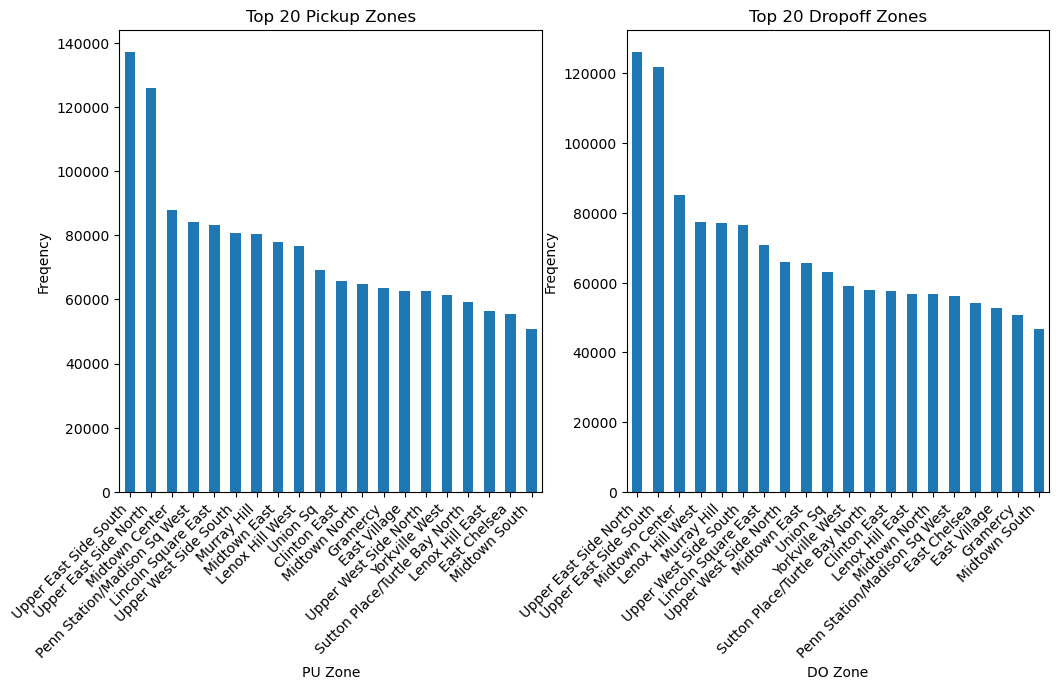

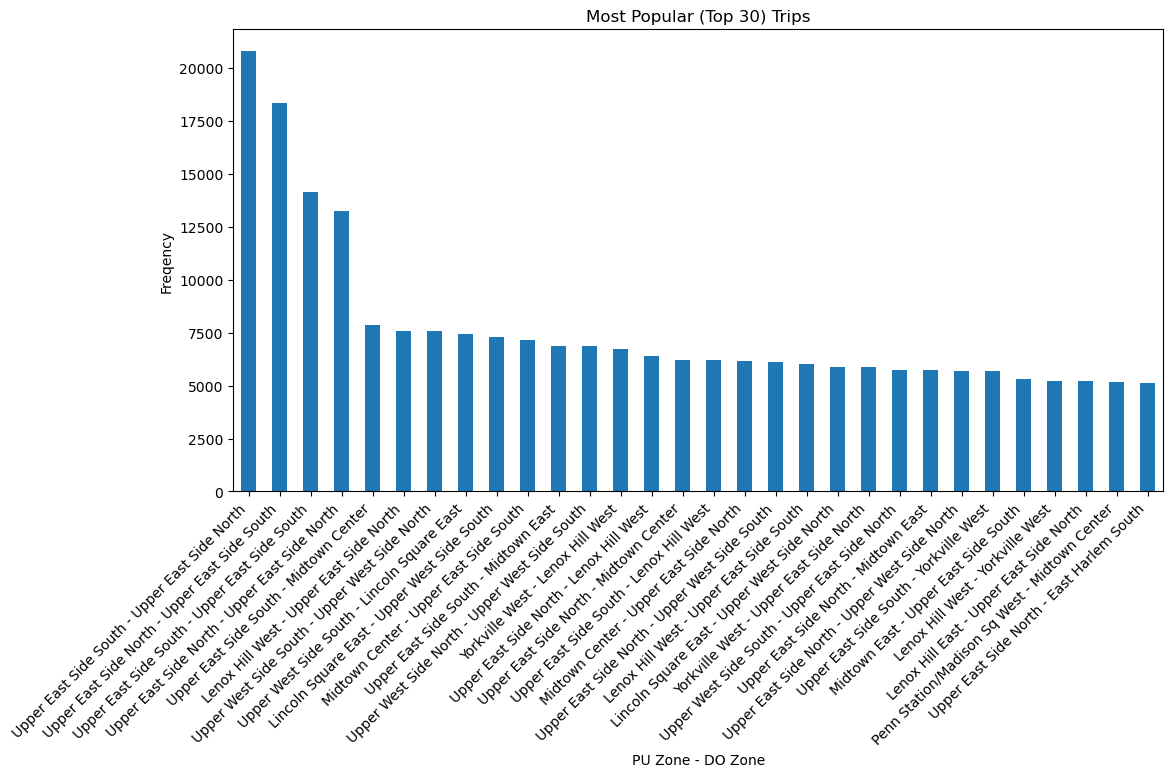

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['PU_zone'].value_counts().iloc[0:20].plot(kind = 'bar')
plt.title('Top 20 Pickup Zones')
plt.xticks(rotation = 45, ha = "right")
plt.xlabel('PU Zone')
plt.ylabel('Freqency')

plt.subplot(1, 2, 2)
df['DO_zone'].value_counts().iloc[0:20].plot(kind = 'bar')
plt.title('Top 20 Dropoff Zones')
plt.xticks(rotation = 45, ha = "right")
plt.xlabel('DO Zone')
plt.ylabel('Freqency')

plt.figure(figsize=(12, 6))
df['From_To'].value_counts().iloc[0:30].plot(kind = 'bar')
plt.title('Most Popular (Top 30) Trips')
plt.xticks(rotation = 45, ha = "right")
plt.xlabel('PU Zone - DO Zone')
plt.ylabel('Freqency')
plt.show()

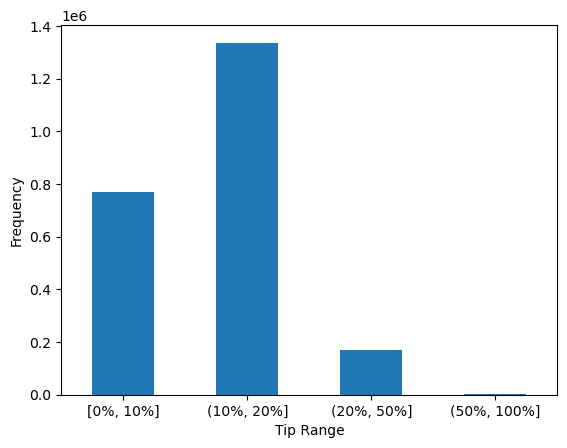

In [8]:
df["Tip_Pct"] = df["tip_amount"] / df["total_amount"]
bin_pct = [0.0, 0.10, 0.2, 0.5, 1.0]
df["Tip_Bin"] = pd.cut(df.Tip_Pct, 
                       bins = bin_pct, 
                       labels = ["[0%, 10%]", "(10%, 20%]", "(20%, 50%]", "(50%, 100%]"], 
                       include_lowest = True)

df["Tip_Bin"].value_counts(sort = False).plot(kind = "bar")
plt.xlabel("Tip Range")
plt.xticks(rotation = 0)
plt.ylabel("Frequency")
plt.show()

In [24]:
a = pd.DataFrame(df[["From_To", "Tip_Bin"]].value_counts()).reset_index()
a = a.pivot(index = "From_To", columns = "Tip_Bin", values = "count").reset_index()


In [39]:
a["Total"] = a.sum(axis = 1, numeric_only = True)
a.sort_values(by = "Total", ascending = False, inplace = True)
a.drop("Total", axis = 1, inplace = True)

<Figure size 1200x600 with 0 Axes>

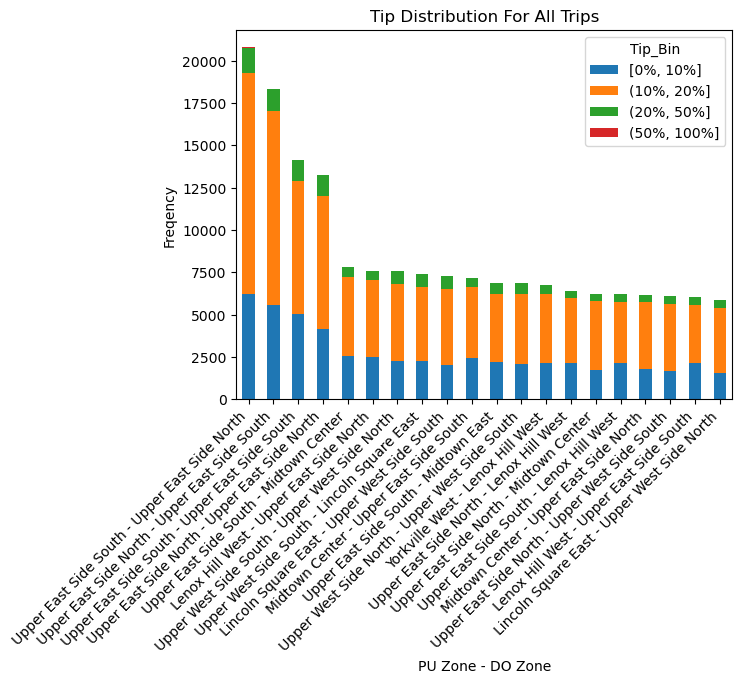

In [42]:
plt.figure(figsize=(12, 6))
a.iloc[0:20].plot(x = "From_To", kind = "bar", stacked = True)
plt.title('Tip Distribution For Top 25 Trips')
plt.xticks(rotation = 45, ha = "right")
plt.xlabel('PU Zone - DO Zone')
plt.ylabel('Freqency')
plt.show()